In [1]:
# Import packages and set numpy random seed
import numpy as np
np.random.seed(5) 
import tensorflow as tf
tf.random.set_seed(2)
from datasets import sign_language
import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-shuffled training and test datasets
(x_train, y_train), (x_test, y_test) = sign_language.load_data()

Using TensorFlow backend.


## Training Data Visualisation

In [2]:
labels = ['A', 'B', 'C']

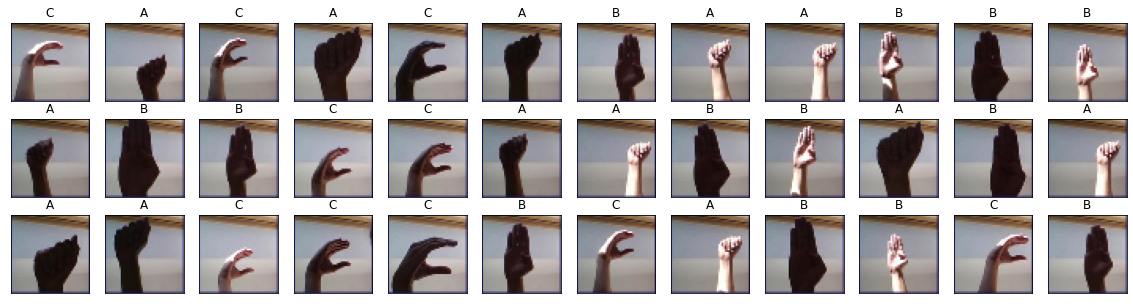

In [3]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

## Examining the dataset

In [4]:
num_A_train = sum(y_train==0)
num_B_train = sum(y_train==1)
num_C_train = sum(y_train==2)

In [5]:
num_A_test = sum(y_test==0)
num_B_test = sum(y_test==1)
num_C_test = sum(y_test==2)

## One-Hot Encoding

In [6]:
from keras.utils import np_utils


y_train_OH = np_utils.to_categorical(y_train)
y_test_OH = np_utils.to_categorical(y_test)

## Defining the model

In [7]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=4))
model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=4))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 5)         380       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        1890      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 135)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 408       
Total params: 2,678
Trainable params: 2,678
Non-trainable params: 0
____________________________________________________

## Compiling the model

In [8]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Training the Model

In [9]:
hist = model.fit(x_train, y_train_OH,
                validation_split=0.20,
                epochs=5,
                batch_size=32)

Train on 1280 samples, validate on 320 samples
Epoch 1/5
1280/1280 [==============================] - 2s 2ms/step - loss: 0.9731 - accuracy: 0.6250 - val_loss: 0.7984 - val_accuracy: 0.7812
Epoch 2/5
1280/1280 [==============================] - 1s 762us/step - loss: 0.6337 - accuracy: 0.8297 - val_loss: 0.4509 - val_accuracy: 0.9219
Epoch 3/5
1280/1280 [==============================] - 1s 765us/step - loss: 0.3745 - accuracy: 0.9250 - val_loss: 0.2475 - val_accuracy: 0.9750
Epoch 4/5
1280/1280 [==============================] - 1s 781us/step - loss: 0.2098 - accuracy: 0.9797 - val_loss: 0.1319 - val_accuracy: 0.9875
Epoch 5/5
1280/1280 [==============================] - 1s 829us/step - loss: 0.1156 - accuracy: 0.9953 - val_loss: 0.0686 - val_accuracy: 1.0000


## Testing the Model

In [10]:
score = model.evaluate(x=x_test, 
                       y=y_test_OH,
                       verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9975000023841858


## Visualising the mistakes

In [11]:
y_probs = model.predict(x_test)

In [12]:
y_preds = np.argmax(y_probs, axis=1)

In [13]:
bad_test_idxs = np.where(y_preds != y_test)[0]

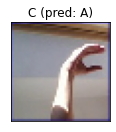

In [14]:
fig = plt.figure(figsize=(25,4))
for i, idx in enumerate(bad_test_idxs):
    ax = fig.add_subplot(2, np.ceil(len(bad_test_idxs)/2), i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    ax.set_title("{} (pred: {})".format(labels[y_test[idx]], labels[y_preds[idx]]))